# **Analysing Titanic Data**

### **Introduction**

In 1912, one of the most famous maritime disasters in history occurred, resulting in the loss of over 1,500 lives.

In this notebook, we will use a dataset that includes information on some of the passengers involved in that tragic incident. This dataset contains data on 891 passengers, which we will analyze to understand the factors that contributed to passenger survival on the Titanic.

Additionally, this notebook will showcase the functions of the data science library Suntzu. 

You can find more info about it here:
 - Source code: [GitHub Repository](https://github.com/Abigor111/SunTzu)
 - Documentation: [Read the Docs](https://suntzu.readthedocs.io/en/latest/index.html)
 - Latest Versions: [PyPI](https://pypi.org/project/suntzu/#history)

### **Packages**

#### Packages Installation

In [1]:
%pip install suntzu

Note: you may need to restart the kernel to use updated packages.


In [2]:
import suntzu as snt
import json
import pandas as pd

#### Packages Versions

In [3]:
print(f"Suntzu version: {snt.__version__}")
print(f"Json version: {json.__version__}")
print(f"Pandas version: {pd.__version__}")

Suntzu version: 0.8.0
Json version: 2.0.9
Pandas version: 2.2.2


### **Data Loading**

#### Getting the Data

If you want to follow along with this notebook on your own notebook, get the dataset [here](https://www.kaggle.com/c/titanic/data?select=train.csv).

In [4]:
df = snt.read_file("titanic.csv")

#### Data Interpretation

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As we can see in this dataset, the information we have on the passengers includes their names, ages, genders, classes, fares, and whether they survived or not. However, we also have some data that we don't immediately understand, such as "SibSp" and "Parch." We will try to determine what these columns mean by reading the metadata of this dataset.

In [6]:
df.shape

(891, 12)

Other information about this dataset is that has 891 rows and 12 columns

### **Functions Demonstration**

#### **Metadata**

In this library, when we want to start cleaning data, optimization, visualization, or working with metadata, we need to begin the process with the function start_. 

For example, to start the metadata process, we will use the function start_ParquetMetadata. This function will return a dataframe with the metadata of the dataset.

This method is used so that when we start a process, we don't have all of the library functions available; we just have the functions needed for that specific process. The reason for this is to help people new to Data Science understand what is done in each process. Of course, this takes some freedom from the user, but it is a good practice to know what is being done in each process. It also makes the code cleaner and more legible for people who are not programmers, helping them understand how the data was treated.

In [7]:
df = snt.start_ParquetMetadata(df)

**Read Metadata**

In [8]:
df.read_parquet_metadata()

No metadata found.


As we can see in the output below, this dataset has no metadata. Let's check the data source to understand what "SibSp" and "Parch" mean. In this case, the dataset source is Kaggle, so let's look at where the data is hosted and see if there is any information about these columns. [Source](https://www.kaggle.com/c/titanic/data?select=train.csv)

Checking the data source we understood what it means "Sibps" and "Parch" and got more info. The info we got was:

| Variable | Definition | Key |
|----------|------------|-----|
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | |
| Age | Age in years | |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


**Insert Metatadata**

To fix the problem of this dataset not having metadata, let's use the information from the website and insert some metadata into this dataset.

To do that let's save this data on json file and then insert it into the database, the way we do that is on the follow-up lines.

In [9]:
metadata = {
        "PassengerId": 
            {"Description": "Unique identifier for each passenger"},
        "Survived": 
            {"Description": "Survival status 0 = No, 1 = Yes"},
        "Pclass": 
            {"Description": "Ticket class", "Calculation": "1 = 1st, 2 = 2nd, 3 = 3rd"},
        "Name": 
            {"Description": "Passenger's name"},
        "Sex": 
            {"Description": "Passenger's gender"},
        "Age": 
            {"Description": "Passenger's age"},
        "SibSp": 
            {"Description": "Number of siblings/spouses aboard the Titanic"},
        "Parch": 
            {"Description": "Number of parents/children aboard the Titanic"},
        "Ticket": 
            {"Description": "Ticket number"},
        "Fare": 
            {"Description": "Ticket fare"},
        "Cabin": 
            {"Description": "Cabin number"},
        "Embarked": 
            {"Description": "Port of embarkation", "Calculation": "(C = Cherbourg, Q = Queenstown, S = Southampton)"}   
}
with open('titanic_metadata.json', 'w') as f:
    json.dump(metadata, f)

Now we use the following function to insert the metadata on file and then export it to a Parquet file because CSV does not support natively metadata

In [10]:
df.insert_parquet_metadata_json("titanic_metadata.json", "titanic.parquet")

So after exporting it let's read the metadata

In [11]:
df = snt.read_file("titanic.parquet")
metadata = snt.start_ParquetMetadata(df)
metadata.read_parquet_metadata()

Column: PassengerId
    Description: Unique identifier for each passenger
Column: Survived
    Description: Survival status 0 = No, 1 = Yes
Column: Pclass
    Description: Ticket class
    Calculation: 1 = 1st, 2 = 2nd, 3 = 3rd
Column: Name
    Description: Passenger's name
Column: Sex
    Description: Passenger's gender
Column: Age
    Description: Passenger's age
Column: SibSp
    Description: Number of siblings/spouses aboard the Titanic
Column: Parch
    Description: Number of parents/children aboard the Titanic
Column: Ticket
    Description: Ticket number
Column: Fare
    Description: Ticket fare
Column: Cabin
    Description: Cabin number
Column: Embarked
    Description: Port of embarkation
    Calculation: (C = Cherbourg, Q = Queenstown, S = Southampton)


#### **Memory Optimization**

Now the next step let's start optimize the memory of the dataframe

In [12]:
optimization = snt.start_Optimization(df)

First, let's check the memory usage of the dataframe

In [13]:
memoryused = optimization.get_memory_usage(show_df=True)

,Col_Name,Memory_Usage(kb)
0,PassengerId,7.09
1,Survived,7.09
2,Pclass,7.09
3,Name,66.23
4,Sex,46.86
5,Age,7.09
6,SibSp,7.09
7,Parch,7.09
8,Ticket,48.64
9,Fare,7.09


As we can see right now the dataframe is using 281 kilobytes of memory, judging by the size of dataframe is quite a lot so let's optimize it. To do that let's check what are the dtypes the dataframe is currently using and what are the best ones.

**Best Dtypes**

In [14]:
optimization.get_best_dtypes(show_df=True)

,Column_Name,Dtype,Best_Dtype
0,PassengerId,int64,int16
1,Survived,int64,int8
2,Pclass,int64,int8
3,Name,object,category
4,Sex,object,category
5,Age,float64,float16
6,SibSp,int64,int8
7,Parch,int64,int8
8,Ticket,object,category
9,Fare,float64,float16


As seen above, none of dataframe columns are using the best_dtype or recommended dtype. Let's fix that by converting it to the best dtypes and check the memory usage after that conversion.

In [15]:
optimization = optimization.get_best_dtypes(convert=True, show_df=True)

,Column_Name,Dtype,Best_Dtype
0,PassengerId,int64,int16
1,Survived,int64,int8
2,Pclass,int64,int8
3,Name,object,category
4,Sex,object,category
5,Age,float64,float16
6,SibSp,int64,int8
7,Parch,int64,int8
8,Ticket,object,category
9,Fare,float64,float16


In [16]:
memoryused = optimization.get_memory_usage(show_df=True)

,Col_Name,Memory_Usage(kb)
0,PassengerId,1.87
1,Survived,1.00
2,Pclass,1.00
3,Name,100.26
4,Sex,1.21
5,Age,1.87
6,SibSp,1.00
7,Parch,1.00
8,Ticket,55.16
9,Fare,1.87


After the conversion we can see that we reduced quite a lot of memory usage, now the dataframe is using only 180 kilobytes of memory. But the memory used by the columns "Name" and "Ticket" increased so let's revert that and investigate later why that increase in memory.

In [17]:
optimization["Name"] = optimization["Name"].astype("object")
optimization["Ticket"] = optimization["Ticket"].astype("object")

In [18]:
memoryused = optimization.get_memory_usage(show_df=True)

,Col_Name,Memory_Usage(kb)
0,PassengerId,1.87
1,Survived,1.00
2,Pclass,1.00
3,Name,66.23
4,Sex,1.21
5,Age,1.87
6,SibSp,1.00
7,Parch,1.00
8,Ticket,48.64
9,Fare,1.87


After reverting the dtype of "Name" we reduced even more the memory usage and now it's only using 140 kilobytes.

It's possible to reduce it even more? Yes, by cleaning the data. As you can see below the columns "Age" and "Fare" are using float values and I think it should make more sense to use int values, so let's convert it.

In [19]:
optimization.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.312500,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925781,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.093750,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.046875,NaN,S


In [20]:
optimization.get_dataframe_mem_insight()

,Column,Dtype,Recommend_Dtype,Memory,Memory_Percentage,Missing_Values,Percentage_of_Missing_Values,Distinct_Values
0,PassengerId,int16,int16,1.87 kb,1.33%,0,0.0%,891
1,Survived,int8,int8,1.0 kb,0.71%,0,0.0%,2
2,Pclass,int8,int8,1.0 kb,0.71%,0,0.0%,3
3,Name,object,category,66.23 kb,47.17%,0,0.0%,891
4,Sex,category,category,1.21 kb,0.86%,0,0.0%,2
5,Age,float16,float16,1.87 kb,1.33%,177,19.87%,88
6,SibSp,int8,int8,1.0 kb,0.71%,0,0.0%,7
7,Parch,int8,int8,1.0 kb,0.71%,0,0.0%,7
8,Ticket,object,category,48.64 kb,34.64%,0,0.0%,681
9,Fare,float16,float16,1.87 kb,1.33%,0,0.0%,242


After using the function above we get meaningful details about the dataframe, that is the column "Age" is missing some values, so if we try to convert it to int it will not work. So let's start by fixing that problem, filling the missing values with the mean value of age as there is not other way to get the age right.

Other detail we can notice is that Cabin is missing a lot of values and that column is not that useful so let's delete it later, another column who is also useless is the PassengerId so we will delete both columns

#### **Optimization and Cleaning**

In [21]:
cleaning = snt.start_Cleaning(optimization)

With the function below filled all missing values on the column **"Age"** with their mean and defined the values to have 0 decimals house, because we want to convert it to *int* later 

In [22]:
cleaning = cleaning.fill_rows_with_missing_values_mean(["Age"], 0)

Now we round all the other values in **"Age"** and **"Fare"** and then we will convert it to *int*

In [23]:
cleaning = cleaning.round_rows_value(["Age", "Fare"], 0)

/home/abigor/miniconda3/envs/suntzu/lib/python3.12/site-packages/suntzu/cleaning.py:144: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self[numerical_cols] = self[numerical_cols].applymap(lambda x: round(x, decimals) if isinstance(x, (int, float)) else x)


In [24]:
cleaning["Age"] = cleaning["Age"].astype("int8")
cleaning["Fare"] = cleaning["Fare"].astype("int8") 

In [25]:
cleaning = snt.Cleaning(cleaning.drop(["PassengerId", "Cabin"], axis=1))

In [26]:
optimization = snt.start_Optimization(cleaning)
optimization.get_memory_usage(show_df=True)

,Col_Name,Memory_Usage(kb)
0,Survived,1.00
1,Pclass,1.00
2,Name,66.23
3,Sex,1.21
4,Age,1.00
5,SibSp,1.00
6,Parch,1.00
7,Ticket,48.64
8,Fare,1.00
9,Embarked,1.25


123.33

After all that cleaning, the memory usage is now 123 kilobytes, which is less than half of the original memory usage.

Now let's return to the cleaning process and add some more steps to make the data even cleaner and more visually pleasing.

#### **Cleaning**

In [27]:
cleaning = snt.start_Cleaning(optimization)
cleaning.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S


In the first step, let's capitalize all the values in the column **"Sex"** to make it more visually pleasing.

In [28]:
cleaning = cleaning.capitalize_rows_string(["Sex"])

Now let's remap the values in the column **"Embarked"** to make it more visually pleasing. Instead of using the initials, we will use the full names.

In [29]:
new_names_for_port_of_embarkation = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
cleaning['Embarked'] = cleaning['Embarked'].map(new_names_for_port_of_embarkation)

In [30]:
cleaning.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",Male,22,1,0,A/5 21171,7,Southampton
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38,1,0,PC 17599,71,Cherbourg
2,1,3,"Heikkinen, Miss. Laina",Female,26,0,0,STON/O2. 3101282,8,Southampton
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35,1,0,113803,53,Southampton
4,0,3,"Allen, Mr. William Henry",Male,35,0,0,373450,8,Southampton


Now let's change the column name and create two new columns from it. Let's start by creating a new column called honorifics. This column will store the honorifics of the passenger. Then, we will create a new column called surname. This column will store the surname of the passenger.

After that, let's reorder the columns to make the dataset more readable.

In [31]:
cleaning = cleaning.split_rows_string("Name", new_cols=["Honorofics"], delete_col=False, separator=".")
cleaning.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Honorofics
0,0,3,Owen Harris,Male,22,1,0,A/5 21171,7,Southampton,"Braund, Mr"
1,1,1,John Bradley (Florence Briggs Thayer),Female,38,1,0,PC 17599,71,Cherbourg,"Cumings, Mrs"
2,1,3,Laina,Female,26,0,0,STON/O2. 3101282,8,Southampton,"Heikkinen, Miss"
3,1,1,Jacques Heath (Lily May Peel),Female,35,1,0,113803,53,Southampton,"Futrelle, Mrs"
4,0,3,William Henry,Male,35,0,0,373450,8,Southampton,"Allen, Mr"


In [32]:
cleaning = cleaning.split_rows_string("Honorofics", new_cols=["Surname"], delete_col=False)
cleaning.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Honorofics,Surname
0,0,3,Owen Harris,Male,22,1,0,A/5 21171,7,Southampton,Mr,Braund
1,1,1,John Bradley (Florence Briggs Thayer),Female,38,1,0,PC 17599,71,Cherbourg,Mrs,Cumings
2,1,3,Laina,Female,26,0,0,STON/O2. 3101282,8,Southampton,Miss,Heikkinen
3,1,1,Jacques Heath (Lily May Peel),Female,35,1,0,113803,53,Southampton,Mrs,Futrelle
4,0,3,William Henry,Male,35,0,0,373450,8,Southampton,Mr,Allen


In [33]:
cleaning = cleaning[['Honorofics','Name','Surname', 'Age', 'Sex', 'SibSp', 'Parch', 'Pclass', 'Ticket', 'Fare', 'Embarked', 'Survived']]
cleaning.head()

,Honorofics,Name,Surname,Age,Sex,SibSp,Parch,Pclass,Ticket,Fare,Embarked,Survived
0,Mr,Owen Harris,Braund,22,Male,1,0,3,A/5 21171,7,Southampton,0
1,Mrs,John Bradley (Florence Briggs Thayer),Cumings,38,Female,1,0,1,PC 17599,71,Cherbourg,1
2,Miss,Laina,Heikkinen,26,Female,0,0,3,STON/O2. 3101282,8,Southampton,1
3,Mrs,Jacques Heath (Lily May Peel),Futrelle,35,Female,1,0,1,113803,53,Southampton,1
4,Mr,William Henry,Allen,35,Male,0,0,3,373450,8,Southampton,0


Notice that the dataset is now more readable and visually pleasing, but the memory usage has increased significantly. This increase is due to the creation of new columns and the expanded memory usage of some columns, such as using full names in the "Embarked" column. While this isn't an issue for our small dataset, it could be problematic for larger datasets. In such cases, the changes made for readability might not be worth the increased memory usage.

In [34]:
optimization = snt.start_Optimization(cleaning)
memoryused = optimization.get_memory_usage(show_df=True)

,Col_Name,Memory_Usage(kb)
0,Honorofics,46.05
1,Name,55.24
2,Surname,48.72
3,Age,1.00
4,Sex,1.21
5,SibSp,1.00
6,Parch,1.00
7,Pclass,1.00
8,Ticket,48.64
9,Fare,1.00


#### **Statistics**

Now in this part, let's start getting some useful informations about the values present on dataset and then create a lot of graphs with the values

In [35]:
statistics = snt.start_Statistics(cleaning)

In [36]:
statistics.get_dataframe_values_insight()

,Column,Dtype,Distinct_Values,Most_Common/Max_Value,Occurrences_of_Max_Value,Percentages_of_Occurrences_of_Max_Value,Less_Common/Min_Value,Occurrences_of_Min_Value,Percentage_of_Occurrences_of_Min_Value,Missing_Values,Percentage_of_Missing_Values
0,Honorofics,object,17,the Countess,1,0.11%,Capt,1,0.11%,0,0.0%
1,Name,object,799,of (Lucy Noel Martha Dyer-Edwards),1,0.11%,(Ada E Hall),1,0.11%,0,0.0%
2,Surname,object,667,van Melkebeke,1,0.11%,Abbing,1,0.11%,0,0.0%
3,Age,int8,71,80,1,0.11%,0,1,0.11%,0,0.0%
4,Sex,category,2,Male,577,64.76%,Female,314,35.24%,0,0.0%
5,SibSp,int8,7,8,7,0.79%,0,608,68.24%,0,0.0%
6,Parch,int8,7,6,1,0.11%,0,678,76.09%,0,0.0%
7,Pclass,int8,3,3,491,55.11%,1,216,24.24%,0,0.0%
8,Ticket,object,681,WE/P 5735,2,0.22%,110152,3,0.34%,0,0.0%
9,Fare,int8,88,120,4,0.45%,-122,4,0.45%,0,0.0%


#### **Visualization**

In [37]:
visualization = snt.start_Visualization(statistics)
settings = snt.change_Settings()

Default Settings for the graphs

In [38]:
settings.increase_graph_size(15, 6)
settings.set_title_settings(size=20)
settings.set_labels_settings()
settings.set_grid()

##### **Bar Plots**

Percentage of Survival per Class

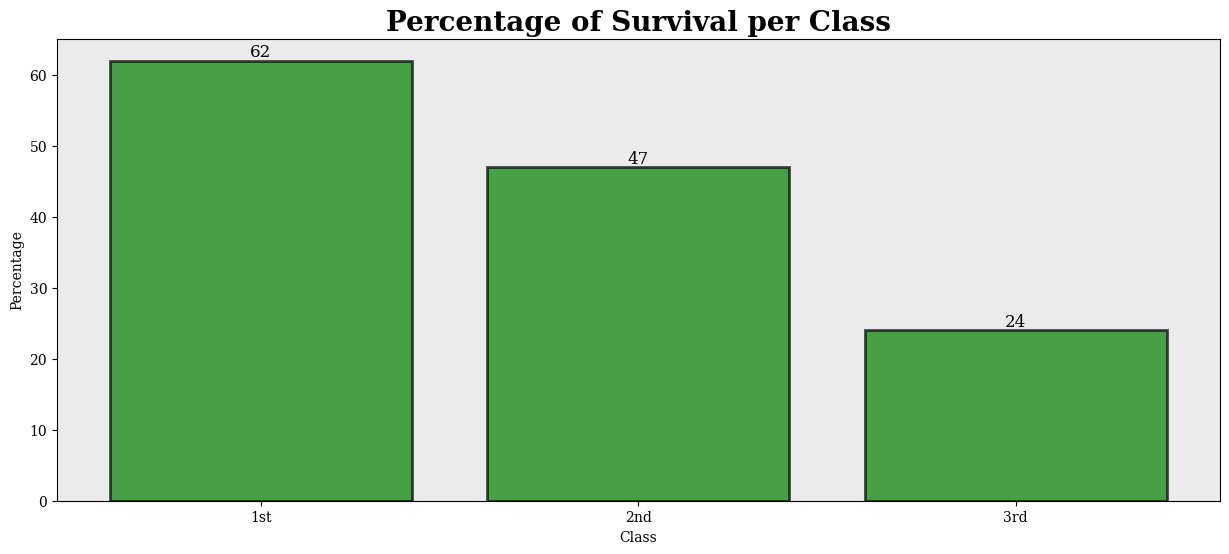

In [39]:
srbc = visualization.groupby('Pclass')['Survived'].mean().reset_index() # srbc stands for survival_rate_by_class
srbc['Survived'] = [int(rate * 100) for rate in srbc['Survived']]
srbc["Pclass"] = srbc["Pclass"].astype(str)
new_names_for_port_of_embarkation = {'1': '1st', '2': '2nd', '3': '3rd'}
srbc['Pclass'] = srbc['Pclass'].map(new_names_for_port_of_embarkation)
srbc = snt.start_Visualization(srbc)
srbc = srbc.barplot(
    "Pclass", 
    "Survived", 
    title="Percentage of Survival per Class", 
    xlabel="Class", 
    ylabel="Percentage"
)
srbc = settings.change_bar_colors(srbc, ["green"], alpha=0.7)
srbc = settings.show_bar_values(srbc)

Survival Rate by Age Group

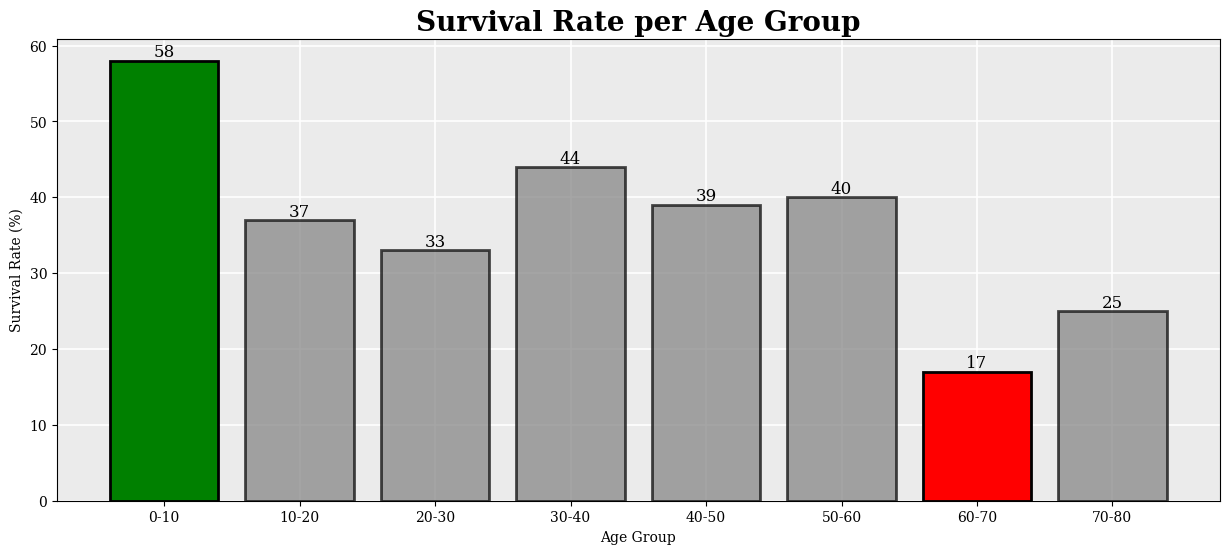

In [40]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
srag = visualization.copy() #srag stands for survival_rate_by_age_group
srag['AgeGroup'] = pd.cut(srag['Age'], bins=age_bins)
srag.dropna(inplace=True)
srag["AgeGroup"] = srag["AgeGroup"].astype(str)
new_names_for_port_of_embarkation = {
    '(0, 10]': '0-10',
    '(10, 20]': '10-20',
    '(20, 30]': '20-30',
    '(30, 40]': '30-40',
    '(40, 50]': '40-50',
    '(50, 60]': '50-60',
    '(60, 70]': '60-70',
    '(70, 80]': '70-80'
}
srag['AgeGroup'] = srag['AgeGroup'].map(new_names_for_port_of_embarkation)
srag = srag.groupby('AgeGroup')['Survived'].mean().reset_index()
srag['Survived'] = (srag['Survived'] * 100).astype(int)
srag = snt.start_Visualization(srag)
srag = srag.barplot(
    "AgeGroup", "Survived",
    title="Survival Rate per Age Group",
    xlabel="Age Group",
    ylabel="Survival Rate (%)",
    grid=True
)
srag = settings.show_bar_values(srag) 
srag = settings.change_bar_colors(srag, ["gray"], alpha=0.7)
srag = settings.highlight_max_min_bar(srag)

Survival Rate by Gender

/tmp/ipykernel_104692/517514277.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  srbg = visualization.groupby('Sex')['Survived'].mean().reset_index() # srbg stands for survival_rate_by_gender


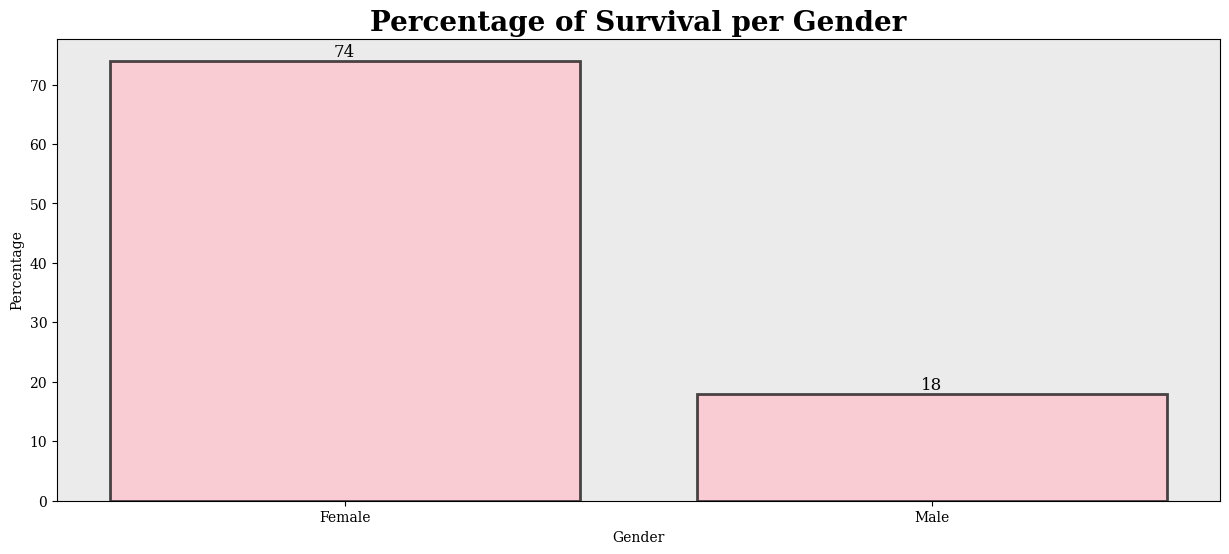

In [41]:
srbg = visualization.groupby('Sex')['Survived'].mean().reset_index() # srbg stands for survival_rate_by_gender
srbg['Survived'] = (srbg['Survived'] * 100).astype(int)
survival_rate_by_gender = snt.start_Visualization(srbg)
srbg = survival_rate_by_gender.barplot(
    "Sex", 
    "Survived", 
    title="Percentage of Survival per Gender", 
    xlabel="Gender", 
    ylabel="Percentage"
)
srbg = settings.change_bar_colors(srbg, ["pink"], alpha=0.7)
srbg = settings.show_bar_values(srbg)

Percentage of Survival Per Port

/tmp/ipykernel_104692/3357246823.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  srbp = visualization.groupby('Embarked')['Survived'].mean().reset_index() # srbp stands for survival_rate_by_port


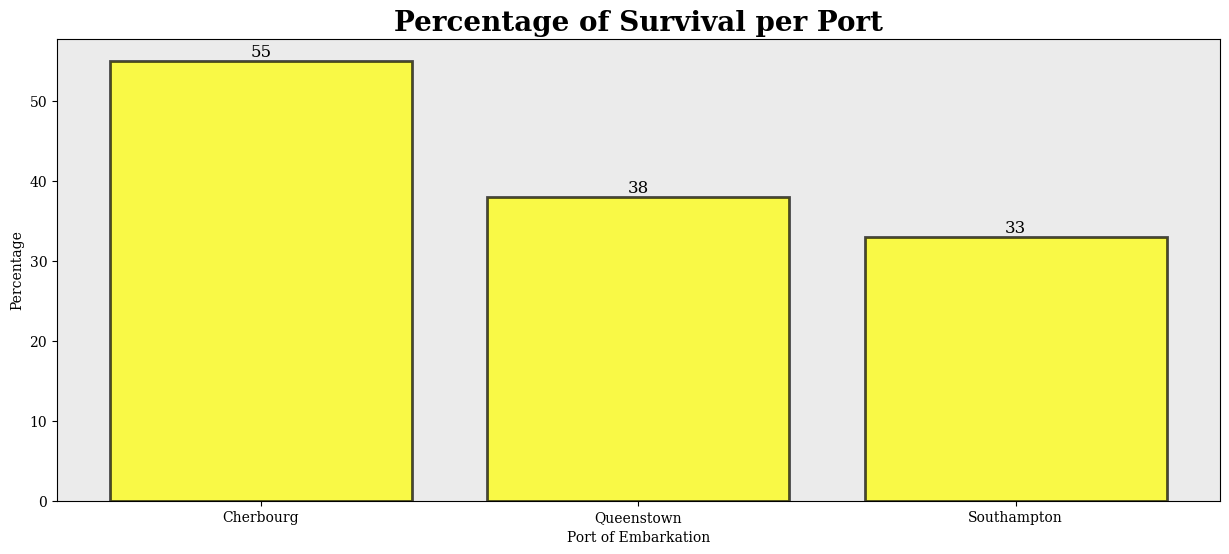

In [42]:
srbp = visualization.groupby('Embarked')['Survived'].mean().reset_index() # srbp stands for survival_rate_by_port
srbp['Survived'] = (srbp['Survived'] * 100).astype(int)
srbp = snt.start_Visualization(srbp)
srbp = srbp.barplot(
    "Embarked", 
    "Survived", 
    title="Percentage of Survival per Port", 
    xlabel="Port of Embarkation", 
    ylabel="Percentage"
)
srbp = settings.change_bar_colors(srbp, ["yellow"], alpha=0.7)
srbp = settings.show_bar_values(srbp)

Percentage of Survival per Honorofic

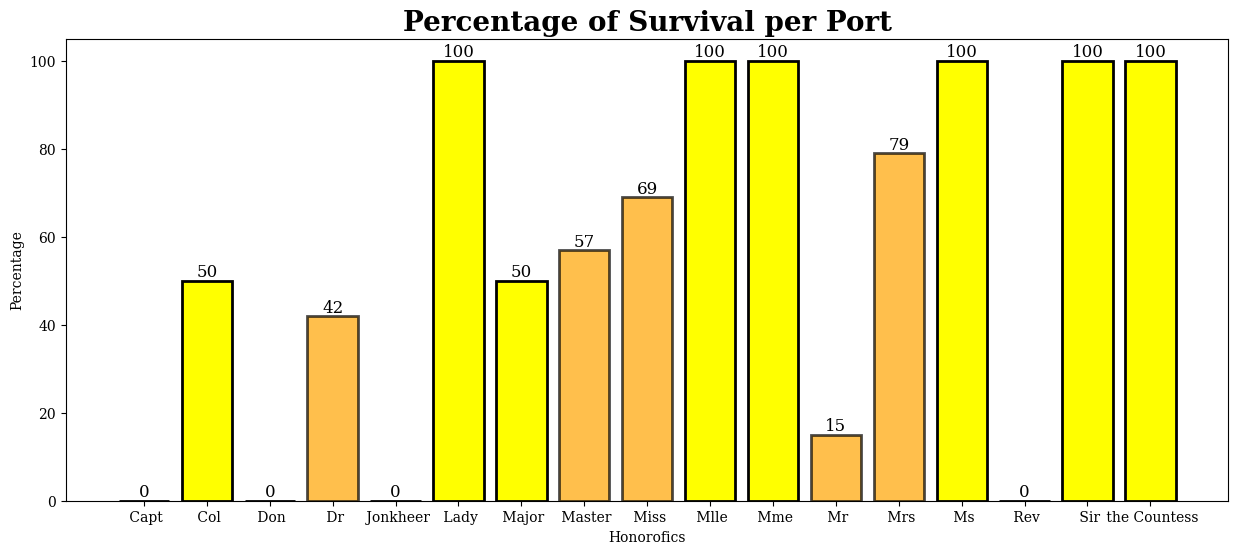

In [54]:
psh = visualization.groupby('Honorofics')['Survived'].mean().reset_index() # psh stands for percentage_of_survival_per_honorofic
psh['Survived'] = (psh['Survived'] * 100).astype(int)
psh = snt.start_Visualization(psh)
psh = psh.barplot(
    "Honorofics", 
    "Survived", 
    title="Percentage of Survival per Port", 
    xlabel="Honorofics", 
    ylabel="Percentage"
)
psh = settings.change_bar_colors(psh, ["orange"], alpha=0.7)
psh = settings.highlight_equal_values(psh, "yellow")
psh = settings.show_bar_values(psh)

##### **Line Plots**

Average Fare per Age Group

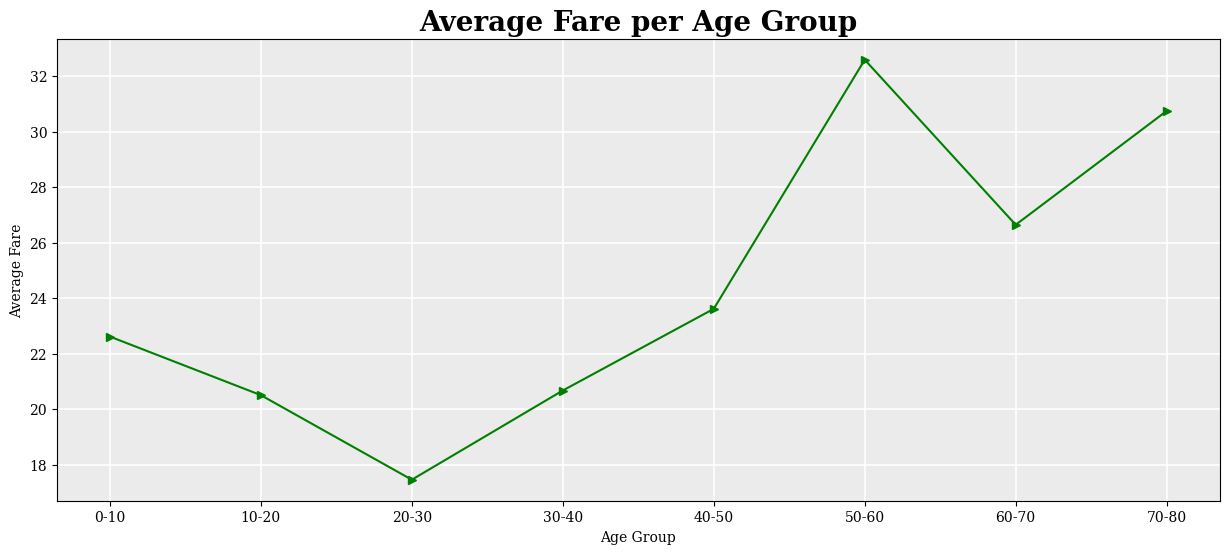

In [43]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
afag = visualization.copy() #afag stands for average_fare_by_age_group
afag['AgeGroup'] = pd.cut(afag['Age'], bins=age_bins)
afag.dropna(inplace=True)
afag["AgeGroup"] = afag["AgeGroup"].astype(str)
new_names_for_port_of_embarkation = {
    '(0, 10]': '0-10',
    '(10, 20]': '10-20',
    '(20, 30]': '20-30',
    '(30, 40]': '30-40',
    '(40, 50]': '40-50',
    '(50, 60]': '50-60',
    '(60, 70]': '60-70',
    '(70, 80]': '70-80'
}
afag['AgeGroup'] = afag['AgeGroup'].map(new_names_for_port_of_embarkation)
afag = afag.groupby('AgeGroup')['Fare'].mean().reset_index()
afag = snt.start_Visualization(afag)
settings.set_line_settings(marker=">")
afag = afag.lineplot(
    "AgeGroup", 
    "Fare", 
    title="Average Fare per Age Group", 
    xlabel="Age Group", 
    ylabel="Average Fare", 
    grid=True
)

Survival Rate by Age Group

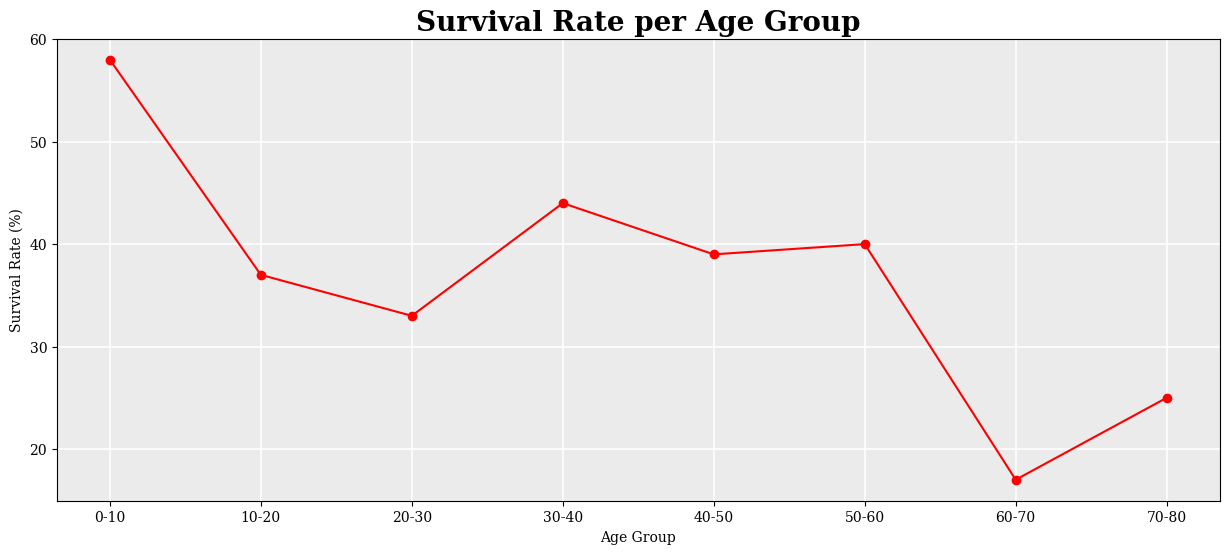

In [44]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
srag = visualization.copy() # srag stands for survival_rate_by_age_group
srag['AgeGroup'] = pd.cut(srag['Age'], bins=age_bins)
srag.dropna(inplace=True)
srag["AgeGroup"] = srag["AgeGroup"].astype(str)
new_names_for_port_of_embarkation = {
    '(0, 10]': '0-10',
    '(10, 20]': '10-20',
    '(20, 30]': '20-30',
    '(30, 40]': '30-40',
    '(40, 50]': '40-50',
    '(50, 60]': '50-60',
    '(60, 70]': '60-70',
    '(70, 80]': '70-80'
}
srag['AgeGroup'] = srag['AgeGroup'].map(new_names_for_port_of_embarkation)
srag = srag.groupby('AgeGroup')['Survived'].mean().reset_index()
srag['Survived'] = (srag['Survived'] * 100).astype(int)
srag = snt.start_Visualization(srag)
settings.set_grid()
settings.set_line_settings("red", marker="o")
srag = srag.lineplot(
    "AgeGroup", 
    "Survived", 
    title="Survival Rate per Age Group", 
    xlabel="Age Group", 
    ylabel="Survival Rate (%)", 
    grid=True
)

Passenger Count by Age Group

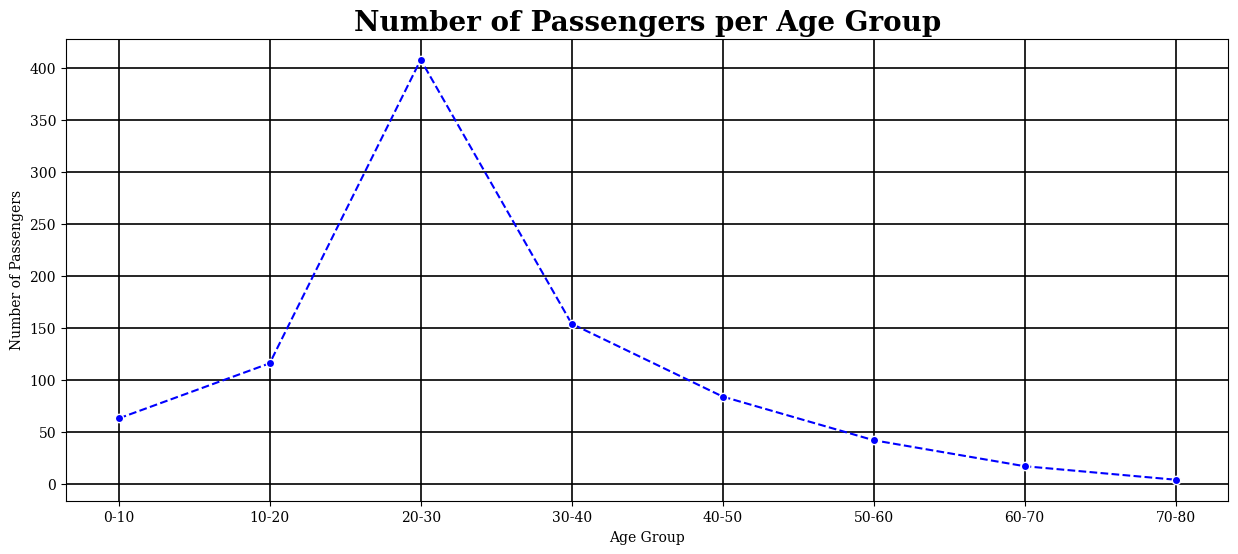

In [45]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
pcag = visualization.copy() # pcag stands for passenger_count_by_age_group
pcag['AgeGroup'] = pd.cut(pcag['Age'], bins=age_bins)
pcag.dropna(inplace=True)
pcag["AgeGroup"] = pcag["AgeGroup"].astype(str)
new_names_for_port_of_embarkation = {
    '(0, 10]': '0-10',
    '(10, 20]': '10-20',
    '(20, 30]': '20-30',
    '(30, 40]': '30-40',
    '(40, 50]': '40-50',
    '(50, 60]': '50-60',
    '(60, 70]': '60-70',
    '(70, 80]': '70-80'
}
pcag['AgeGroup'] = pcag['AgeGroup'].map(new_names_for_port_of_embarkation)
pcag = pcag.groupby('AgeGroup').size().reset_index(name='PassengerCount')
pcag = snt.start_Visualization(pcag)
settings.set_line_settings("blue", "--", marker="o", markeredgecolor="white")
settings.set_grid(grid_backgroundcolor="ffffff", gridline="black")
pcag = pcag.lineplot(
    "AgeGroup", "PassengerCount",
    title="Number of Passengers per Age Group",
    xlabel="Age Group",
    ylabel="Number of Passengers",
    grid=True
)

##### **Sending images via Slack**

In [46]:
settings.help_slack_bot()


            1. Creating a slack_bot (read the first paragraph): https://medium.com/applied-data-science/how-to-build-you-own-slack-bot-714283fd16e5
            2. Getting the channel_id (read method 1): https://www.process.st/how-to/find-slack-channel-id/ 
            


Use tutorial below and then save your credentials, I will not save mine for obvious reasons.

In [47]:
# settings.save_slack_credentials()

In [48]:
settings.send_images_via_slack("../imgs/numberofpassengerspergroup.png", 
                               caption="Here is a graph that shows the number of passengers per age group")

/home/abigor/miniconda3/envs/suntzu/lib/python3.12/site-packages/slack_sdk/web/internal_utils.py:422: UserWarning: client.files_upload() may cause some issues like timeouts for relatively large files. Our latest recommendation is to use client.files_upload_v2(), which is mostly compatible and much stabler, instead.
  warnings.warn(message)


The photo was sent.


##### **Sending images via Telegram**

In [49]:
settings.help_telegram_bot()


        1. How to create a bot: https://www.directual.com/lesson-library/how-to-create-a-telegram-bot
        2. Adding the bot to a group: https://botifi.me/en/help/telegram-adding-bot-to-channel-or-group/
        3. Getting the bot_token: https://botifi.me/en/help/telegram-existed-bot/
        4. Getting the chat_id of a group: https://www.wikihow.com/Know-Chat-ID-on-Telegram-on-Android
        5. Possible errors: https://core.telegram.org/api/errors
        


Use tutorial below and then save your credentials, I will not save mine for obvious reasons.

In [50]:
# settings.save_telegram_credentials()

In [51]:
settings.send_images_via_telegram("../imgs/numberofpassengerspergroup.png", caption="Here is a graph that shows the number of passengers per age group")

The photo was sent.
